
<div style="text-align: center;">
    <h1>Pharmaceuticals Analysis using Matplotlib</h1>
    <p>A Matplotlib.pyplot Project</p>
</div>

### Read in Dataset

In [ ]:
# Libraries: import python dependencies/libraries to facilitate analysis.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# File Paths: Create variables that will identify where the file locations are, where the data is stored.
# These are the variables that hold the csv path location
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read Files: Create variables that will read in the data based on the file locations.
# These are the two variables that will read in the csv file data based on the path location variables already created.
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [ ]:
# Test1: Call the data using the "read file" variables that were defined in the setup section.
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [ ]:
#Test2: The variables cannot be called in the same code block because it will call only the last line. Read the data using 
# the second defined variable.
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [ ]:
# Merge the two datasets on the "Mouse ID" column. 
# Define variable and use pandas merge function (pd.merge) on "Mouse ID" so that no data is lost
merged_mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

merged_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Duplicates Analysis

In [ ]:
# Unique Count:
# Display a list of each column with the .nunique function

merged_mouse_study.nunique() 

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [ ]:
# Print Statement:
# Print a statement of how many Mouse ID's there are.

print("There are 249 Mouse IDs in this dataset.")

There are 249 Mouse IDs in this dataset.


In [ ]:
# Finding All Duplicates:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
# Create a DataFrame that holds just the Mouse ID and Timepoints and assign it a variable name
mouse_timepoint_duplicates = pd.DataFrame(merged_mouse_study, columns=['Mouse ID', 'Timepoint'])
# Print the DataFrame
mouse_timepoint_duplicates

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [ ]:
# Finding Duplicates (exclude first instances):
# Use pandas function ".duplicated" to find Mouse ID's with duplicates and remove first instances of duplicates.
duplicate_results = mouse_timepoint_duplicates[mouse_timepoint_duplicates.duplicated()]
# Create and print a header description for results
print("The duplicate Mouse ID/Timepoint rows, except for the first instances, are:")
# Print the findings
print(duplicate_results)

The duplicate Mouse ID/Timepoint rows, except for the first instances, are:
    Mouse ID  Timepoint
909     g989          0
911     g989          5
913     g989         10
915     g989         15
917     g989         20


In [ ]:
# View Duplicate Data:

# I want my table to be displayed centered for better visibility. I am importing an HTML library so that I can use CSS styling.
from IPython.display import display, HTML

# Find the rows where 'Mouse ID' is 'g989'. Also, define it as a new variable to display the dataframe centered.
duplicate_data = merged_mouse_study.loc[merged_mouse_study['Mouse ID'] == 'g989']

# Convert the DataFrame to an HTML table and apply centering with CSS
html_table = duplicate_data.to_html(index=False)
centered_html = f"""
<div style="display: flex; justify-content: center;">
    {html_table}
</div>
"""

# Display the centered HTML
display(HTML(centered_html))

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1
g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
# Clean Dataframe (Index/Delete rows):
# Create a clean DataFrame by dropping duplicate Mouse ID data associatd with g989.
# Index a row based on value 'g989' in the dataset and define it with a variable "delete_index_g989"
delete_index_g989 = merged_mouse_study[merged_mouse_study["Mouse ID"]== 'g989'].index
# Use pandas drop function (.drop), with g989 indexed variable to delete the g989 data from the dataset.
merged_mouse_study = merged_mouse_study.drop(delete_index_g989)
merged_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [ ]:
# Re-count Mouse ID's:
# Checking the number of mice in the clean DataFrame. There should be one less Mouse ID than the previous count.
merged_mouse_study.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

In [ ]:
# Print a new mouse count findings statment after dataset was cleaned
print("I searched the dataset, found one Mouse ID with duplicates and deleted all the data associated with that ID. There are now 248 unique mouse ID's")

I searched the dataset, found one Mouse ID with duplicates and deleted all the data associated with that ID. There are now 248 unique mouse ID's


### Duplicate Mouse ID Findings

This dataset includes numerous mouse drug trials, and while the small number of duplicates may seem insignificant—like a 
drop in the bucket—it’s important to ensure the dataset remains clean and consistent. Removing duplicates, even if they 
appear trivial, helps maintain the integrity of the analysis by ensuring all data points are unique and reliable. Although 
the single Mouse ID with duplicate entries in this case may not drastically impact the overall statistics, it's easy to 
imagine scenarios where duplicates could accumulate and skew results. Therefore, identifying and removing duplicates is not 
only good practice but a crucial step in data preprocessing.

## Summary Statistics

In [ ]:
# Unique Count: Column Specific
# With the already created merged dataset, to a unique count on the Drug Regimen column only.
merged_mouse_study['Drug Regimen'].nunique()

10

In [ ]:
# Summary Statistics (Method One):
# Generate a summary statistics table of mean, median, variance, standard deviation/error of the tumor volume for each drug regimen.
# Use ".groupby" to calculate the properties of each drug regimen.
drug_regimen_group = merged_mouse_study.set_index('Drug Regimen').groupby(['Drug Regimen'])
# Define variables using "m_t_v" for mouse_tumor_volume and use pandas functions to calculate tumor volume statistics.
m_t_v_mean = drug_regimen_group['Tumor Volume (mm3)'].mean()
m_t_v_median = drug_regimen_group['Tumor Volume (mm3)'].median()
m_t_v_variance = drug_regimen_group['Tumor Volume (mm3)'].var()
m_t_v_standard_deviation = drug_regimen_group['Tumor Volume (mm3)'].std()
m_t_v_standard_error = drug_regimen_group['Tumor Volume (mm3)'].sem()
# Create a Dataframe in Pandas that assembles the statistics.
m_t_v_dataframe = pd.DataFrame({"Mean":m_t_v_mean,"Median":m_t_v_median,
                                "Variance":m_t_v_variance,"Standard Deviation":m_t_v_standard_deviation,
                                "Standard Error":m_t_v_standard_error})

# Print the new DataFrame
m_t_v_dataframe

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Aggregation (Method Two):
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen
# Use pandas group function (.groupby) to group 'Drug Regimen' column and assign it a variable
drug_regimen_group = merged_mouse_study.groupby('Drug Regimen')
# Use pandas aggregation function (.agg) with the grouped variable to create a summary statistics table
aggregation_method = drug_regimen_group.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
# Print to screen
aggregation_method.head(10)

C:\Users\Mathew\AppData\Local\Temp\ipykernel_18928\2952071441.py:7: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  aggregation_method = drug_regimen_group.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
round_m_t_v_df = m_t_v_dataframe.round(2)  # Adjust to two decimal places
round_m_t_v_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [ ]:
# CSS Style
# Center align all of the table headers and text within the table.
# Create uniform column width to make the dataframe more easily readable.
# Apply CSS styling to center headers
# Also, round the digit to two decimal places to make it even easier to read.


m_t_v_dataframe = m_t_v_dataframe.round(2)  # This rounds the number to two decimal places.

styled_df = m_t_v_dataframe.style.set_table_styles(
    [
        {
            'selector': 'th, td',  # Targets both headers and data cells
            'props': [
                ('text-align', 'center'),  # Center-align text
                ('width', '150px')        # Set uniform column width
            ]
        }
    ]
).set_properties(**{'text-align': 'center'}) \
 .format(precision=2, na_rep="")  # Format numbers to display only 2 decimals without trailing zeros

styled_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

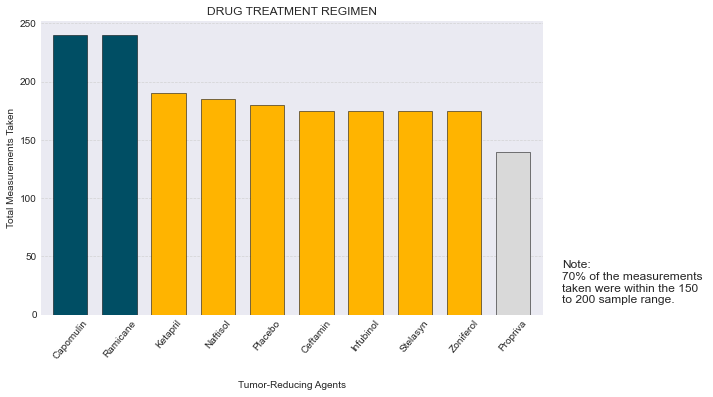

In [ ]:
# Further Modified Pandas Bar Chart:
# In this section make the chart easier to read by applying ascending order, a color scheme and removing the border.
# Also, save a copy of the final Bar Chart to .png for use in the README.md and other outlets.

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.transforms import Bbox
from IPython.display import display, HTML

# Sample DataFrame (replace with your actual data)
data = {'Drug Regimen': ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
        'Total Measurements': [240, 175, 175, 190, 185, 180, 140, 240, 175, 175]}
merged_mouse_dataset = pd.DataFrame(data)

# Prepare the data for plotting
bar_plot_dataframe = merged_mouse_dataset.set_index('Drug Regimen')['Total Measurements']

# Sort the data in descending order
bar_plot_dataframe = bar_plot_dataframe.sort_values(ascending=False)

# Define custom colors based on conditions
colors = ['#D9D9D9' if value <= 150 else '#FFB400' if value <= 200 else '#004E64' for value in bar_plot_dataframe]

# Plot with custom colors
fig, ax = plt.subplots(figsize=(9, 6))
bar_plot_dataframe.plot.bar(
    ax=ax,
    legend=False,
    rot=50,
    title='DRUG TREATMENT REGIMEN',
    color=colors, # Apply custom colors
    width=.7,
    edgecolor='black',    # Add black outline to bars
    linewidth=.5           # Set outline width
)

# Add labels
ax.set_ylabel("Total Measurements Taken")
ax.set_xlabel("Tumor-Reducing Agents", labelpad=20)  # Add padding to the x-axis label

# Remove the frame by hiding top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Incorporate a text label regarding circle size
plt.text(10, 10, 'Note:\n70% of the measurements \ntaken were within the 150 \nto 200 sample range.', fontsize=12)

# Adjust bottom padding to prevent label clipping
plt.subplots_adjust(bottom=0.2)

# Add gridlines only along the y-axis
ax.grid(True, axis='y', linestyle='--', linewidth=0.7, color='lightgray')
ax.grid(False, axis='x')  # Disable x-axis gridlines

# Save with a custom bounding box
custom_bbox = Bbox.from_bounds(0.0, 0.0, 8, 4)  # x, y, width, height (adjust as needed)
plt.savefig("images/DrugRegimen_PandasBarChart.png", dpi=300, bbox_inches='tight')

# Display HTML to center the chart
# display(HTML("""
# <div style="display: flex; justify-content: center;">
#     <img src="PandasBarChart.png" style="max-width: 100%; height: 100%;">
# </div>
# """))

# Display the plot
plt.show()


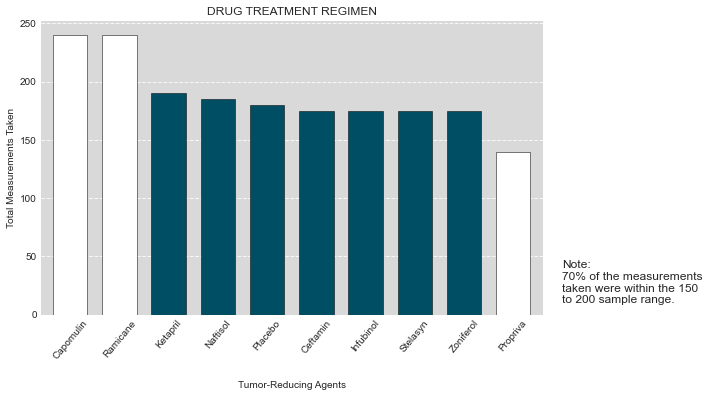

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.transforms import Bbox

# Sample DataFrame (replace with your actual data)
data = {'Drug Regimen': ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
        'Total Measurements': [240, 175, 175, 190, 185, 180, 140, 240, 175, 175]}
merged_mouse_dataset = pd.DataFrame(data)

# Prepare the data for plotting
bar_plot_dataframe = merged_mouse_dataset.set_index('Drug Regimen')['Total Measurements']

# Sort the data in descending order
bar_plot_dataframe = bar_plot_dataframe.sort_values(ascending=False)

# Define custom colors based on conditions
colors = ['#FFFFFF' if value <= 150 else '#004E64' if value <= 200 else '#FFFFFF' for value in bar_plot_dataframe]

# Plot with custom colors
fig, ax = plt.subplots(figsize=(9, 6))

# Set custom background color
ax.set_facecolor("#D9D9D9")

# Create bar chart
bar_plot_dataframe.plot.bar(
    ax=ax,
    legend=False,
    rot=50,
    title='DRUG TREATMENT REGIMEN',
    color=colors,  # Apply custom colors
    width=.7,
    edgecolor='black',  # Add black outline to bars
    linewidth=.5       # Set outline width
)

# Add labels
ax.set_ylabel("Total Measurements Taken")
ax.set_xlabel("Tumor-Reducing Agents", labelpad=20)  # Add padding to the x-axis label

# Remove the frame by hiding top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a text note
plt.text(10, 10, 'Note:\n70% of the measurements \ntaken were within the 150 \nto 200 sample range.', fontsize=12)

# Adjust bottom padding to prevent label clipping
plt.subplots_adjust(bottom=0.2)

# Improve Grid Visibility
ax.grid(True, axis='y', linestyle='--', linewidth=1, alpha=0.8, color='white', zorder=0)  
ax.grid(False, axis='x')  # Disable x-axis gridlines

# Save with a custom bounding box
custom_bbox = Bbox.from_bounds(0.0, 0.0, 8, 4)  # x, y, width, height (adjust as needed)
plt.savefig("images/DrugRegimen_PandasBarChart2.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [ ]:
# Pandas Pie Chart
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Use (.groupby) with "Sex" and define a new variable for gender 
mouse_gender = merged_mouse_study.groupby("Sex")
# Use (.count()) with new "mouse_group" variable to define another variable that holds the count of each gender
gender_count = mouse_gender["Drug Regimen"].count()
# Show the sorted data
gender_count

Sex
Female    922
Male      958
Name: Drug Regimen, dtype: int64

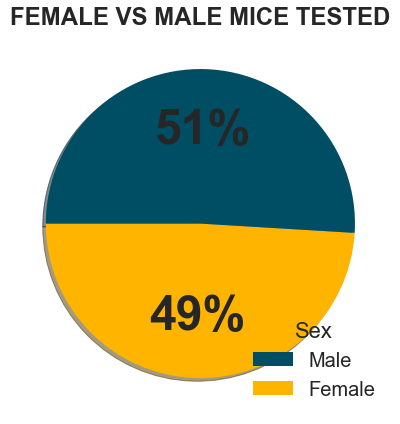

In [ ]:
# Refined Pyplot Pie Chart:

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from IPython.display import display, HTML

# Define variables for pie chart data
colors = ["#FFB400", "#004E64"]
gender = ["Female", "Male"]

# Example data for the counts of genders (adjust `gender_count` based on your data)
gender_count = [922, 958]

# Create the pie chart
fig, ax = plt.subplots(figsize=(9, 6))  # Create a figure with specified size
wedges, texts, autotexts = ax.pie(
    gender_count,
    colors=colors,
    autopct="%1.0f%%",
    shadow=True,
    startangle=180,
    textprops={'fontsize': 48, 'fontweight': 'bold'}  # Bold and larger font for percentages
)

# Center percentages in each slice
for autotext in autotexts:
    # autotext.set_horizontalalignment('center')  # Align percentages to the center
    autotext.set_verticalalignment('center')    # Align percentages vertically

# Add a title with enhanced font size
plt.title('FEMALE VS MALE MICE TESTED', fontsize=24, weight='bold')

# Create a legend using color patches
legend_elements = [
    Patch(facecolor=colors[1], label="Male"),  # Male first
    Patch(facecolor=colors[0], label="Female"),  # Female second
]
plt.legend(
    handles=legend_elements, 
    title="Sex", 
    loc="lower right",  # Legend in the lower right corner
    fontsize=20, 
    title_fontsize=22
)

# Save the plot as a temporary file
plt.tight_layout()
plt.savefig("images/PyplotPieChart.png", bbox_inches="tight")  # Save image temporarily

# Clean up
plt.show()

In [ ]:
# Count Each Drug Measurement:
# Do a total count of measurements by drug to use in Pie Chart
drug_regimen_group = merged_mouse_study.set_index('Drug Regimen').groupby(['Drug Regimen'])
# Create a count column
drug_regimen_count = drug_regimen_group['Tumor Volume (mm3)'].count()
# Create a pandas dataframe to view 
drug_count_dataframe = pd.DataFrame({"Tumor Volume (mm3)": drug_regimen_count})
# Sort the DataFrame by the "Tumor Volume (mm3)" column in descending order
drug_count_dataframe = drug_count_dataframe.sort_values(by="Tumor Volume (mm3)", ascending=False)

drug_count_dataframe

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


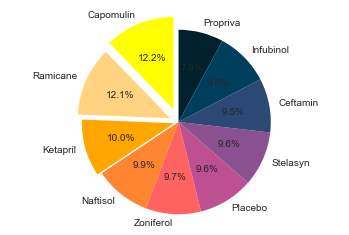

In [ ]:
# Advanced Pyplot Pie Chart:

# Generate a Pyplot Pie Chart showing the % of measurements per drug
drugs = ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"]
measurements = [230,228,188,186,182,181,181,178,178,148]
colors = ["yellow","#ffd380","#ffa600","#ff8531","#ff6361","#bc5090","#8a508f","#2c4875","#003f5c","#00202e"]
# Explode the first three wedges of the pie
explode = (0.15,0.1,0.05,0,0,0,0,0,0,0)
# Plot the pie chart
plt.pie(measurements, explode=explode, labels=drugs, colors=colors,
        autopct="%1.1f%%", startangle=90)
# Set Pie chart axis
plt.axis("equal")
plt.show()

### Mouse Drug Trial Findings
It looks to me like this drug trial was not biased toward any one drug or any gender.  There are slight differences in the numbers, but for the most part, the drugs were tested at about the same rate and evenly amongst gender.  I would say that for this trial to be trusted, it would need to administer the exact same amount of test measurements per drug with an even split amongst gender.  For example, if there were 230 tests administered of Capomulin, then there should be 230 tests measurements for all the other drugs.  Further, if there were 230 measurements per drug regimen, then there should be 115 tests per male and 115 tests per female across all drugs.  I would think that this would provide the most accurate picture of what these drugs are capable of and which one is more effective at achieving its goal.

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Ketapril, and Naftisol
capomulin = merged_mouse_study.loc[merged_mouse_study["Drug Regimen"] == "Capomulin",:]
ramicane = merged_mouse_study.loc[merged_mouse_study["Drug Regimen"] == "Ramicane", :]
ketapril = merged_mouse_study.loc[merged_mouse_study["Drug Regimen"] == "Ketapril", :]
naftisol = merged_mouse_study.loc[merged_mouse_study["Drug Regimen"] == "Naftisol", :]

In [ ]:
# Capomulin:
# Start by getting the last (greatest) timepoint for each mouse
capomulin_last_greatest = capomulin.groupby('Mouse ID').max()['Timepoint']
capomulin_dataframe = pd.DataFrame(capomulin_last_greatest)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(capomulin_dataframe, merged_mouse_study, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [ ]:
# Quantitatively determine Capomulin outliers
capomulin_tumor = capomulin_merge["Tumor Volume (mm3)"]

quartile = capomulin_tumor.quantile([.25,.5,.75])
lower_quartile = quartile[0.25]
upper_quartile = quartile[0.75]
iqr = upper_quartile-lower_quartile
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"Capomulin treatment has tumor volume outlier values that are below {lower_bound} and values above {upper_bound}.")

Capomulin treatment has tumor volume outlier values that are below 20.70456164999999 and values above 51.83201549.


In [ ]:
# Ramicane:
# Start by getting the last (greatest) timepoint for each mouse
ramicane_last_greatest = ramicane.groupby('Mouse ID').max()['Timepoint']
ramicane_dataframe = pd.DataFrame(ramicane_last_greatest)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramicane_merge = pd.merge(ramicane_dataframe, merged_mouse_study, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [ ]:
# Quantitatively determine Ramicane outliers
ramicane_tumor = ramicane_merge["Tumor Volume (mm3)"]

quartile = ramicane_tumor.quantile([.25,.5,.75])
lower_quartile = quartile[0.25]
upper_quartile = quartile[0.75]
iqr = upper_quartile-lower_quartile
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"Ramicane treatment has tumor volume outlier values that are below {lower_bound} and values above {upper_bound}.")

Ramicane treatment has tumor volume outlier values that are below 17.912664470000003 and values above 54.30681135.


In [ ]:
# Ketapril:
# Start by getting the last (greatest) timepoint for each mouse
ketapril_last_greatest = ketapril.groupby('Mouse ID').max()['Timepoint']
ketapril_dataframe = pd.DataFrame(ketapril_last_greatest)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ketapril_merge = pd.merge(ketapril_dataframe, merged_mouse_study, on=("Mouse ID","Timepoint"),how="left")
ketapril_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a457,10,Ketapril,Female,11,30,49.783419,0
1,c580,30,Ketapril,Male,22,25,58.046569,3
2,c819,40,Ketapril,Male,21,25,62.175705,1
3,c832,45,Ketapril,Male,18,29,65.415955,3
4,d474,40,Ketapril,Male,18,27,60.233733,1


In [ ]:
# Quantitatively determine Ketapril outliers
ketapril_tumor = ketapril_merge["Tumor Volume (mm3)"]

quartile = ketapril_tumor.quantile([.25,.5,.75])
lower_quartile = quartile[0.25]
upper_quartile = quartile[0.75]
iqr = upper_quartile-lower_quartile
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"Ketapril treatment has tumor volume outlier values that are below {lower_bound} and values above {upper_bound}.")

Ketapril treatment has tumor volume outlier values that are below 36.99186244000001 and values above 89.60048379999998.


In [ ]:
# Naftisol:
# Start by getting the last (greatest) timepoint for each mouse
naftisol_last_greatest = naftisol.groupby('Mouse ID').max()['Timepoint']
naftisol_dataframe = pd.DataFrame(naftisol_last_greatest)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
naftisol_merge = pd.merge(naftisol_dataframe, merged_mouse_study, on=("Mouse ID","Timepoint"),how="left")
naftisol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a818,45,Naftisol,Female,12,28,74.997764,2
1,b559,45,Naftisol,Male,20,26,73.051363,1
2,e213,45,Naftisol,Male,8,27,63.105696,4
3,e291,25,Naftisol,Female,14,29,55.138953,2
4,e584,45,Naftisol,Male,9,27,68.359777,4


In [ ]:
# Quantitatively determine Naftisol outliers
naftisol_tumor = naftisol_merge["Tumor Volume (mm3)"]

quartile = naftisol_tumor.quantile([.25,.5,.75])
lower_quartile = quartile[0.25]
upper_quartile = quartile[0.75]
iqr = upper_quartile-lower_quartile
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"Naftisol treatment has tumor volume outlier values that are below {lower_bound} and values above {upper_bound}.")

Naftisol treatment has tumor volume outlier values that are below 25.85334408499999 and values above 95.78978676500002.


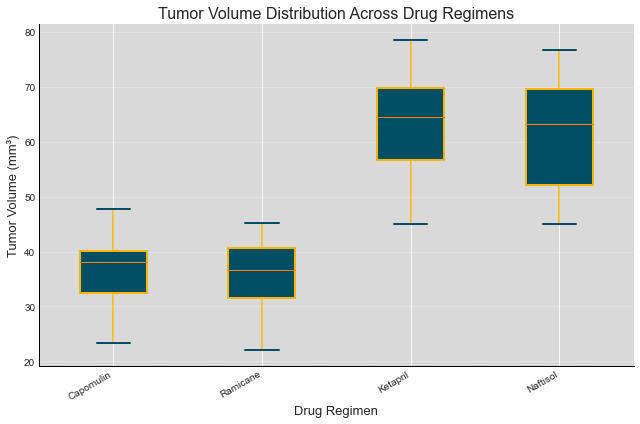

In [ ]:
import matplotlib.pyplot as plt

# Data: Tumor volumes for each drug regimen (ensure these variables are defined as per your data)
drug_regimen_tumor_data = [capomulin_tumor, ramicane_tumor, ketapril_tumor, naftisol_tumor]

# Customize plot style
plt.style.use('seaborn-darkgrid')  # Use a seaborn style for better grid lines

# Create figure and axis with adjusted size
fig1, ax1 = plt.subplots(figsize=(9, 6))

# Set background color for the plot area
ax1.set_facecolor('#D9D9D9')

# Title and labels
ax1.set_title('Tumor Volume Distribution Across Drug Regimens', fontsize=16)
ax1.set_ylabel('Tumor Volume (mm³)', fontsize=13)
ax1.set_xlabel('Drug Regimen', fontsize=13)

# Customize box plot properties
boxplot = ax1.boxplot(
    drug_regimen_tumor_data, 
    labels=["Capomulin", "Ramicane", "Ketapril", "Naftisol"],
    patch_artist=True,  # Enables box face color customization
    boxprops=dict(color='#FFB400', linewidth=2, facecolor='#004E64'), 
    whiskerprops=dict(color='#FFB400', linewidth=1.5),
    capprops=dict(color='#004E64', linewidth=2),
    flierprops=dict(marker='o', color='red', markersize=5)
)

# Keep axis lines/spines visible
for spine in ax1.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)  # Adjust linewidth for better visibility
    spine.set_color('black')  # Set color to black or any preferred color

# Hide the top and right spines (remove the frame)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Add gridlines for readability (white grid lines)
ax1.yaxis.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.7)

# Rotate x-axis labels slightly for clarity
plt.xticks(rotation=30, ha='right')

# Show the plot
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


## Line and Scatter Plot

In [ ]:
# Line Plot:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_line = capomulin.loc[capomulin["Mouse ID"] == "g288",:]
capomulin_line.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
235,g288,Capomulin,Male,3,19,0,45.000000,0
236,g288,Capomulin,Male,3,19,5,45.839400,0
237,g288,Capomulin,Male,3,19,10,46.304003,1
238,g288,Capomulin,Male,3,19,15,42.172301,1
239,g288,Capomulin,Male,3,19,20,42.957120,1


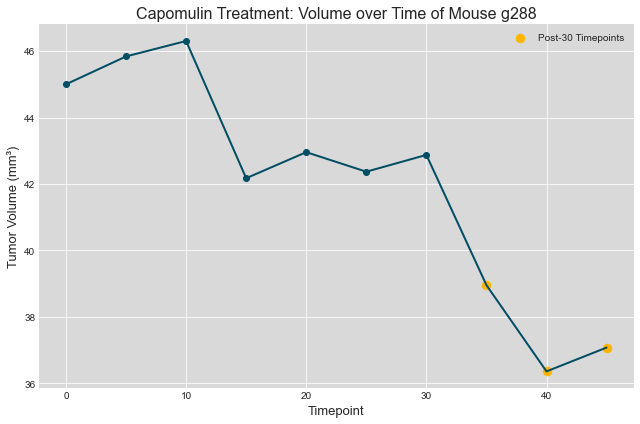

In [ ]:
import matplotlib.pyplot as plt
import os

# Ensure the images folder exists
os.makedirs("images", exist_ok=True)

# Define data
x_axis = capomulin_line["Timepoint"]
tumor_volume = capomulin_line["Tumor Volume (mm3)"]

# Custom colors
line_color = "#004E64"         # Main line color
primary_marker_color = "#004E64"  # Same as line color
highlight_marker_color = "#FFB400"  # Secondary color for Timepoint > 30
background_color = "#D9D9D9"

# Create figure and axis
plt.figure(figsize=(9, 6))
ax = plt.gca()
ax.set_facecolor(background_color)

# Plot main line
plt.plot(x_axis, tumor_volume, color=line_color, linewidth=2)

# Plot all primary markers
plt.scatter(
    x_axis,
    tumor_volume,
    color=primary_marker_color,
    s=36  # markersize squared
)

# Highlight markers where Timepoint > 30
highlight = capomulin_line[capomulin_line["Timepoint"] > 30]
plt.scatter(
    highlight["Timepoint"],
    highlight["Tumor Volume (mm3)"],
    color=highlight_marker_color,
    s=72,  # 2x size
    label="Post-30 Timepoints"
)

# Labels and title
plt.title('Capomulin Treatment: Volume over Time of Mouse g288', fontsize=16)
plt.xlabel('Timepoint', fontsize=13)
plt.ylabel('Tumor Volume (mm³)', fontsize=13)

# Optional layout and legend
plt.legend()
plt.tight_layout()

# Save figure
plt.savefig("images/Capomulin_TumorVolume_OverTime_LineChart.png")

# Show
plt.show()

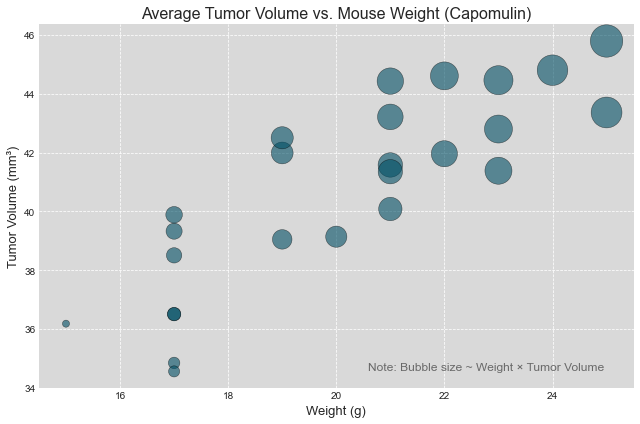

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Ensure 'images' folder exists
os.makedirs('images', exist_ok=True)

# Group by Mouse ID and calculate the mean
capomulin_average = capomulin.groupby(['Mouse ID']).mean()

# Define x and y
x = capomulin_average['Weight (g)']
y = capomulin_average['Tumor Volume (mm3)']

# Improve bubble size scaling to avoid overflow
bubble_size = ((x * y) - (x * y).min()) / ((x * y).max() - (x * y).min()) * 1000 + 50

# Create figure and set size for Jupyter Notebook
plt.figure(figsize=(9, 6))

# Custom background color (replace with your preferred grey if needed)
plt.gca().set_facecolor('#D9D9D9')  # <-- Your custom grey

# Bubble plot
plt.scatter(x, y, s=bubble_size, c='#004E64', alpha=0.6,
            edgecolors='black', linewidth=0.5)

# Title and axis labels
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin)', fontsize=16)
plt.xlabel('Weight (g)', fontsize=13)
plt.ylabel('Tumor Volume (mm³)', fontsize=13)

# Annotation in bottom right
plt.annotate('Note: Bubble size ~ Weight × Tumor Volume',
             xy=(0.95, 0.05), xycoords='axes fraction',
             ha='right', fontsize=12, color='dimgrey')

# Hide top and right borders
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Add white grid lines
plt.grid(True, linestyle='--', linewidth=.75, color='white', alpha=1)

# Layout
plt.tight_layout()

# Save to images folder
plt.savefig('images/Capomulin_TumorVolume_Vs_MouseWeight.png', dpi=300)

# Show plot
plt.show()


### Correlation and Regression

In [ ]:
# Correlation Coefficient:
# Find the correlation coefficient/linear regression model for mouse weight vs average tumor volume in the Capomulin regimen
# Use scipy.stats function Pearson Correlation and define a variable to hold the results
capomulin_correlation=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
# Print a statement with the results
print(f"The correlation between mouse weight in grams and the average tumor volume in cubic millimeters is {capomulin_correlation}")

The correlation between mouse weight in grams and the average tumor volume in cubic millimeters is 0.84


In [ ]:
# Linear Regression:
# Use scipy stats, linear regression, function (.linregress) and define a variable to hold the value
capomulin_linear=st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
capomulin_linear

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

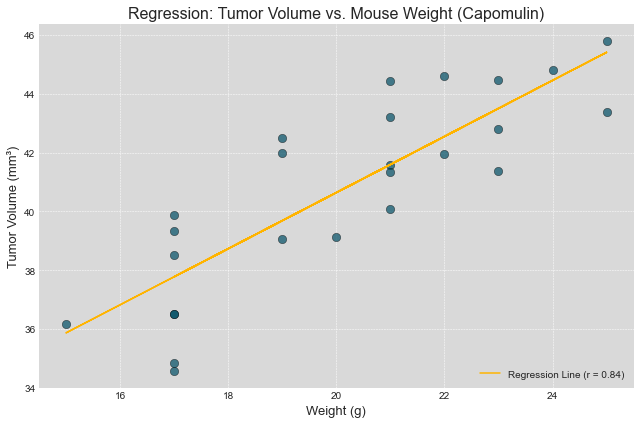

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import linregress

# Ensure 'images' folder exists
os.makedirs('images', exist_ok=True)

# Group by Mouse ID and calculate the mean
capomulin_average = capomulin.groupby(['Mouse ID']).mean()

# Define x and y
x = capomulin_average['Weight (g)']
y = capomulin_average['Tumor Volume (mm3)']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

# Create figure
plt.figure(figsize=(9, 6))
ax = plt.gca()
ax.set_facecolor('#D9D9D9')  # Custom grey background

# Scatter plot
plt.scatter(x, y, s=70, color='#004E64', alpha=0.7, edgecolors='black', linewidth=0.5)

# Regression line
plt.plot(x, regression_line, color='#FFB400', linewidth=1.5, label=f'Regression Line (r = {r_value:.2f})')

# Title and labels
plt.title('Regression: Tumor Volume vs. Mouse Weight (Capomulin)', fontsize=16)
plt.xlabel('Weight (g)', fontsize=13)
plt.ylabel('Tumor Volume (mm³)', fontsize=13)

# Add legend with r-value
plt.legend(loc='lower right', fontsize=10)

# Grid and styling
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=1)
plt.tight_layout()

# Save to images folder
plt.savefig('images/Capomulin_TumorVolume_MouseWeight_RegressionLine.png', dpi=300)

# Show plot
plt.show()